# **House Pricing Machine lerning Model**

# **Load data**

In [12]:
from google.colab import files
uploaded = files.upload()

Saving house_data.csv to house_data (1).csv


In [13]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['house_data.csv']))
df


,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53,2,967,5,39,652,1.5,0.0,0
1,55,2,815,5,33,1000,1.0,2.0,1
2,56,3,900,5,35,897,1.5,1.0,0
3,58,3,1007,6,24,964,1.5,2.0,0
4,64,3,1100,7,50,1099,1.5,1.5,0
...,...,...,...,...,...,...,...,...,...
123,32,4,1065,7,25,492,1.5,0.0,0
124,42,3,585,5,50,713,1.0,0.0,0
125,43,2,593,4,30,465,2.0,1.0,0
126,53,3,716,6,30,585,1.0,2.0,1


# Data preperation

## Data separation as X and Y

In [19]:
y = df['Price']
y

0      53
1      55
2      56
3      58
4      64
       ..
123    32
124    42
125    43
126    53
127    62
Name: Price, Length: 128, dtype: int64

In [18]:
x = df.drop('Price', axis=1)
x

,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,2,967,5,39,652,1.5,0.0,0
1,2,815,5,33,1000,1.0,2.0,1
2,3,900,5,35,897,1.5,1.0,0
3,3,1007,6,24,964,1.5,2.0,0
4,3,1100,7,50,1099,1.5,1.5,0
...,...,...,...,...,...,...,...,...
123,4,1065,7,25,492,1.5,0.0,0
124,3,585,5,50,713,1.0,0.0,0
125,2,593,4,30,465,2.0,1.0,0
126,3,716,6,30,585,1.0,2.0,1


### Data splitting

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=100)

In [24]:
x_train


,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
26,3,1124,7,50,1129,1.5,1.5,0
97,3,2287,6,29,2752,1.0,2.0,0
74,4,2045,9,40,1045,2.5,1.0,1
84,3,777,6,25,449,1.0,0.0,0
89,3,991,7,30,902,2.0,1.0,0
...,...,...,...,...,...,...,...,...
87,2,766,4,30,418,2.0,1.0,0
103,5,1198,8,50,1244,1.5,0.0,0
67,2,944,5,39,684,1.5,0.0,0
24,2,943,5,35,904,1.5,1.0,0


In [25]:
x_test

,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
11,4,1043,7,30,676,1.5,0.0,0
106,2,933,5,30,1431,1.0,1.0,0
105,2,1107,7,30,722,2.0,0.0,1
73,4,1278,8,33,810,1.5,1.5,0
92,2,942,5,35,880,1.5,1.0,0
21,3,1023,7,30,900,2.0,1.0,0
111,3,859,5,33,994,1.0,2.0,1
122,2,1114,7,30,746,2.0,0.0,1
25,3,1041,6,24,966,1.5,2.0,0
51,2,2191,6,29,2688,1.0,2.0,0


# Model Building

## Linear Regression

### ***Training the model***

In [26]:
from ctypes import LibraryLoader
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)


LinearRegression()

### **Applying the mode to make a prediction**

In [27]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

### **Evaluate model preformance**

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [43]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse,lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', "Training R2", "Testing MSE", "Testing R2"]

In [44]:
lr_results

,Method,Training MSE,Training R2,Testing MSE,Testing R2
0,Linear regression,48.411276,0.739649,69.794838,0.458638


## Random Forest 

### ***Training the model***

In [46]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

### **Applying the mode to make a prediction**

In [47]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

### **Evaluate model preformance**

In [48]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [49]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse,rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', "Training R2", "Testing MSE", "Testing R2"]

## **Model comparison**

In [57]:
df_models = pd.concat([lr_results, rf_results], axis=0)

In [58]:
df_models.reset_index(drop=True)


,Method,Training MSE,Training R2,Testing MSE,Testing R2
0,Linear regression,48.411276,0.739649,69.794838,0.458638
1,Random Forest,41.673983,0.775882,82.544868,0.359743


# **Data visualization of prediction results**

Text(0.5, 0, 'Experimental Price')

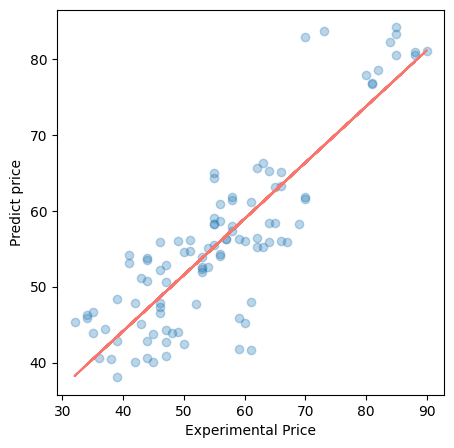

In [83]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, alpha=0.3)


z = np.polyfit(y_train,  y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train,p(y_train), "#F8766D")
plt.ylabel("Predict price")
plt.xlabel("Experimental Price")